In [3]:
import sys
sys.path.append('../')

import pyaudio
import wave
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from IPython import display

from utils.voice.wav_utils import *
from utils.config_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
chunk = 64000
sample_format = pyaudio.paFloat32
channels = 1
fs = 16000
time_in_seconds = 4
filename = "soundsample.wav"

In [5]:
p = pyaudio.PyAudio()  # Create an interface to PortAudio
 
print('-----Now Recording-----')
 
#Open a Stream with the values we just defined
stream = p.open(format=sample_format,
                channels = channels,
                rate = fs,
                frames_per_buffer = chunk,
                input = True)
 
frames = []  # Initialize array to store frames
 
# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * time_in_seconds)):
    data = stream.read(chunk)
    frames.append(data)
 
# Stop and close the Stream and PyAudio
stream.stop_stream()
stream.close()
p.terminate()
 
print('-----Finished Recording-----')

-----Now Recording-----
-----Finished Recording-----


In [6]:
# Open and Set the data of the WAV file
file = wave.open(filename, 'wb')
file.setnchannels(channels)
file.setsampwidth(p.get_sample_size(sample_format))
file.setframerate(fs)
 
#Write and Close the File
file.writeframes(b''.join(frames))
file.close()

In [7]:
data_f = np.frombuffer(data, dtype=np.float32)

In [8]:
display.Audio(r"D:\Advait\Handouts_and_assignments\Raspberry_Pi\whistle_activated_camera\notebooks\soundsample.wav")

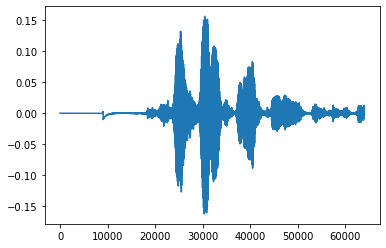

In [9]:
plt.plot(data_f)

In [10]:
# convert single frame to spectrogram
cfg = read_config()

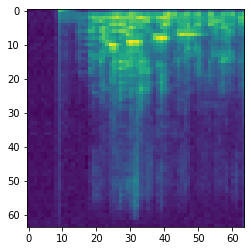

In [15]:
spec = get_spectrogram(data_f, cfg['spectrogram_config'])
plt.imshow(spec)
plt.show()

c:\users\advait\miniconda3\envs\tf2_gpu\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


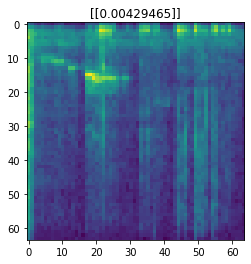

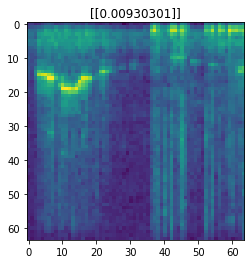

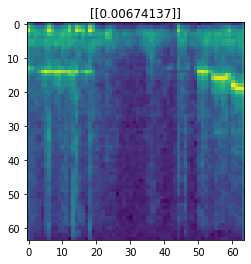

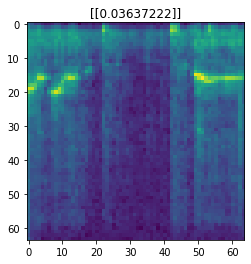

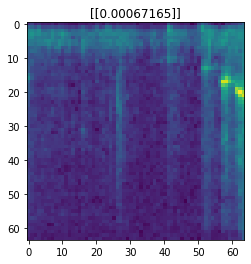

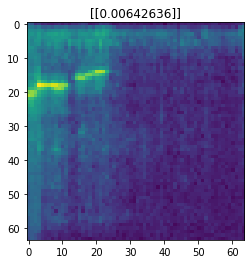

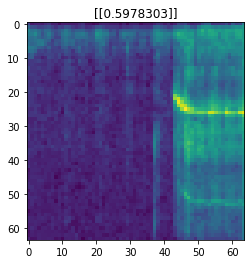

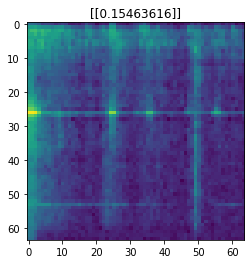

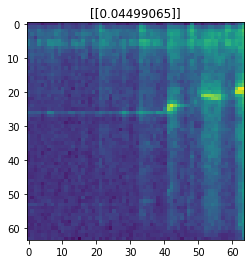

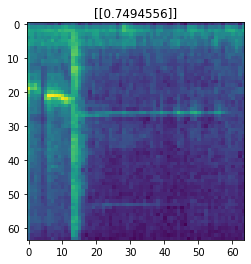

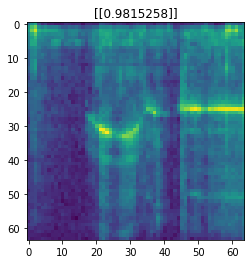

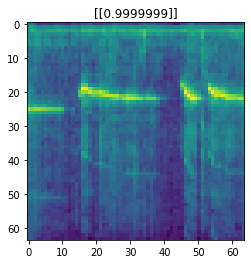

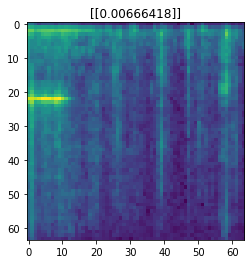

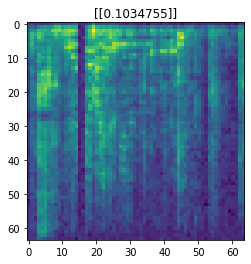

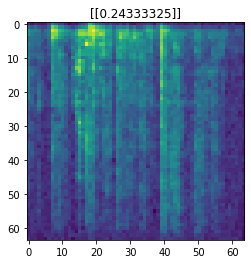

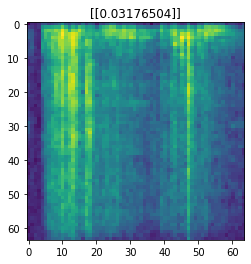

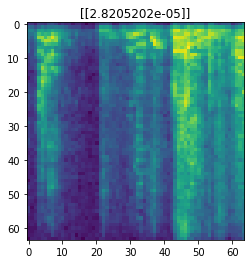

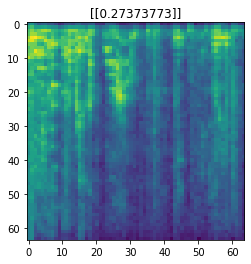

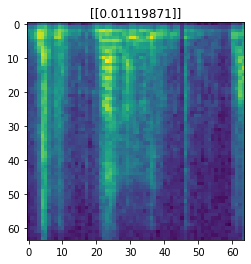

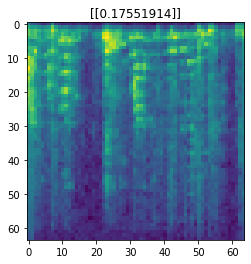

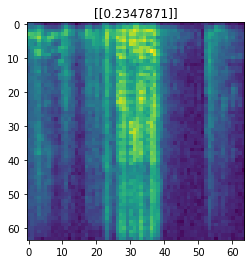

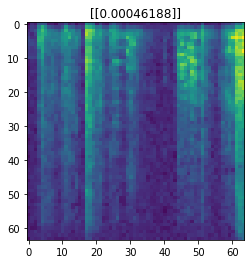

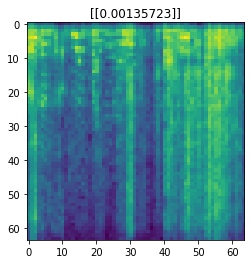

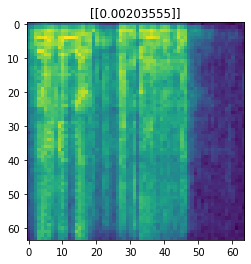

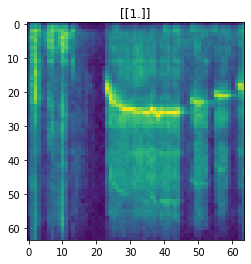

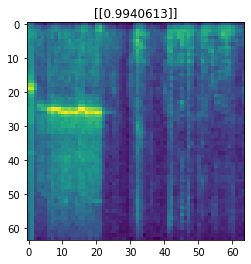

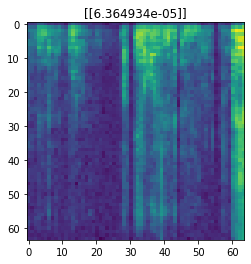

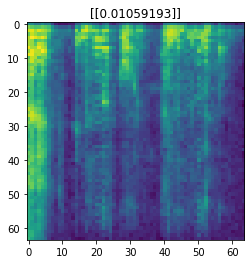

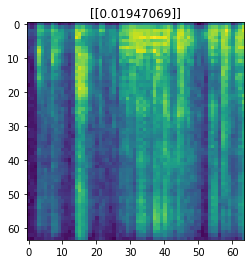

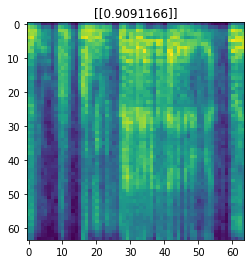

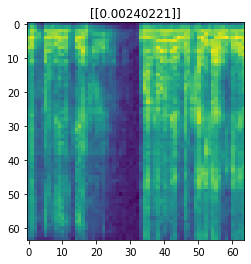

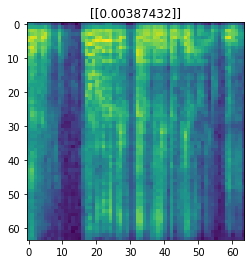

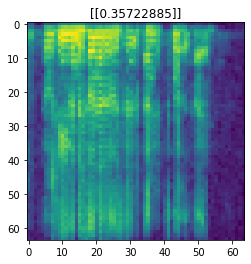

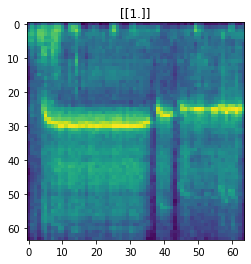

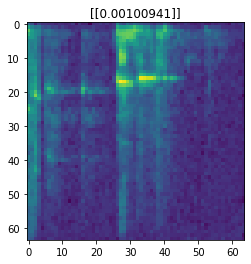

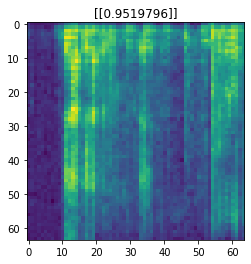

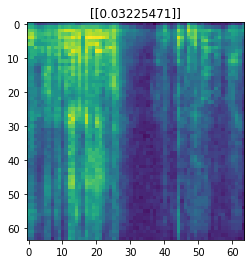

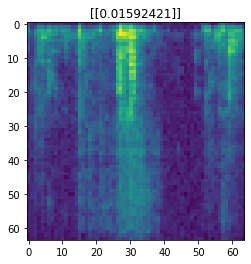

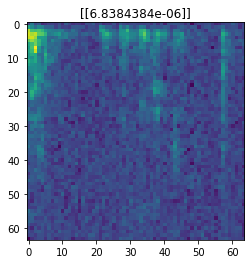

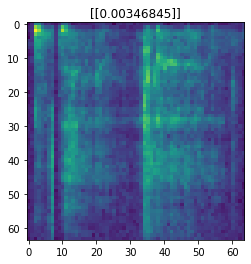

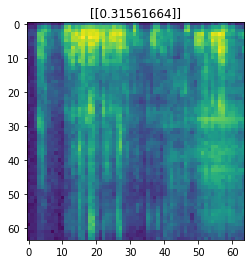

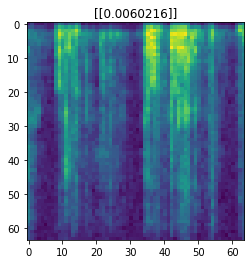

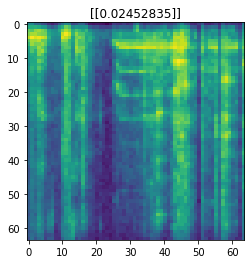

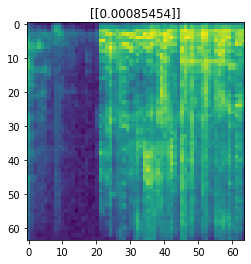

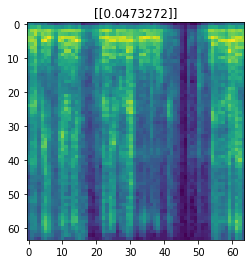

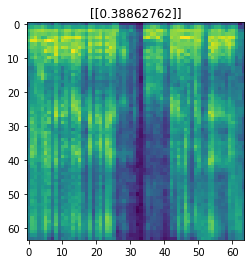

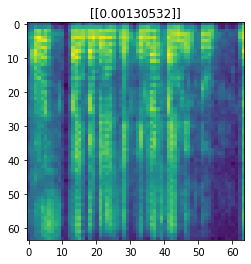

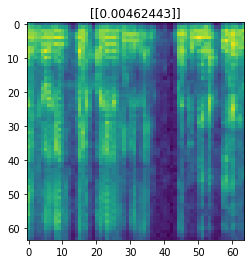

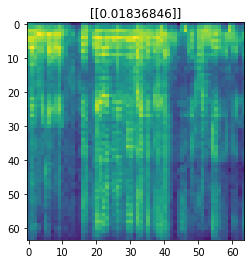

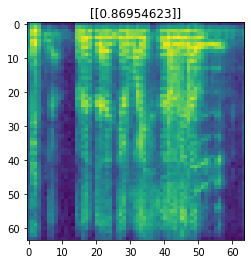

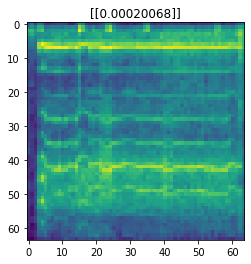

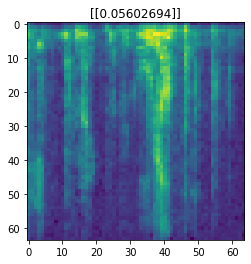

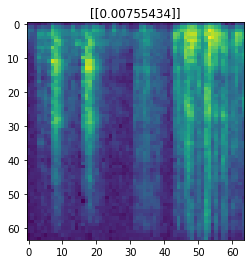

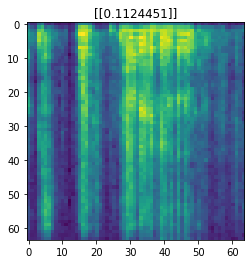

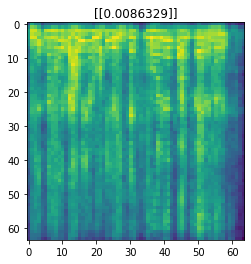

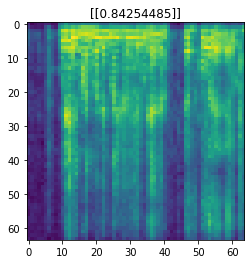

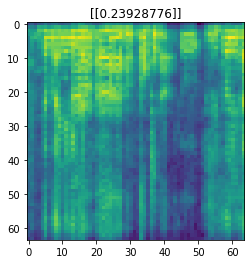

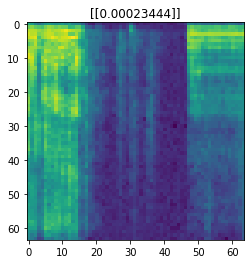

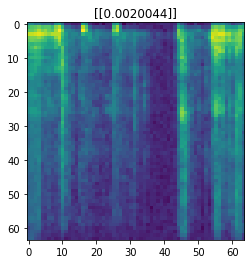

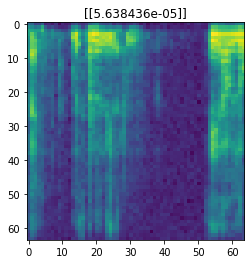

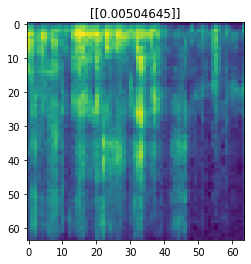

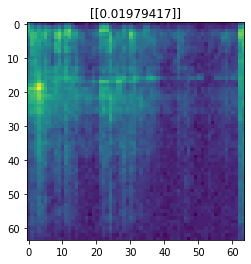

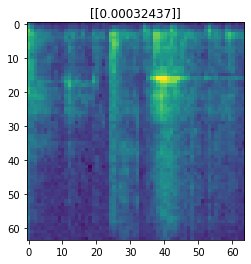

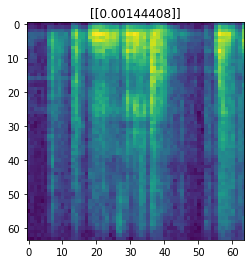

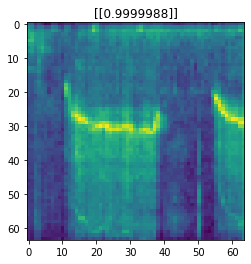

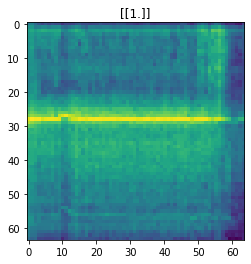

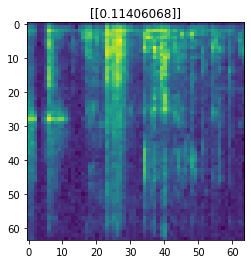

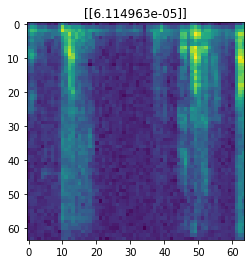

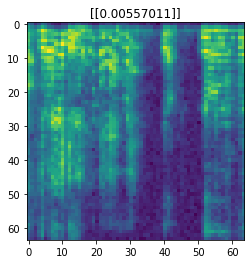

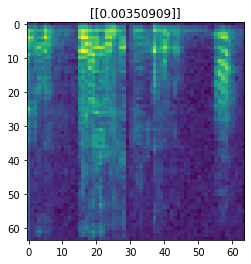

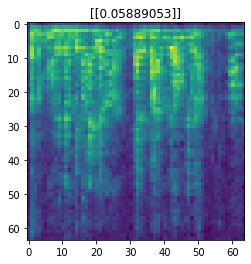

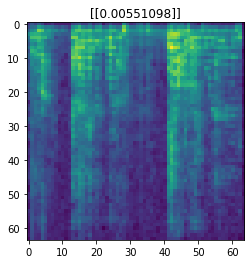

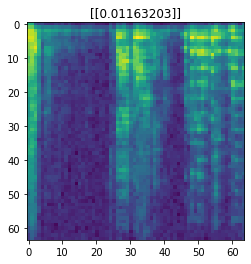

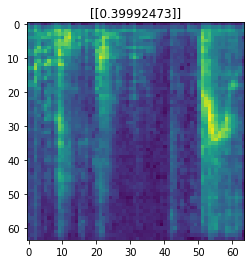

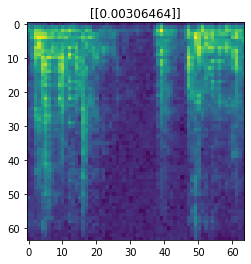

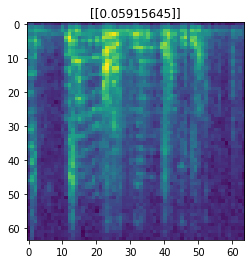

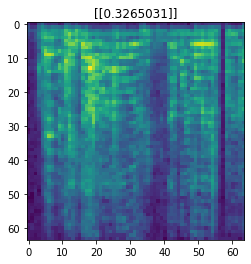

KeyboardInterrupt: 

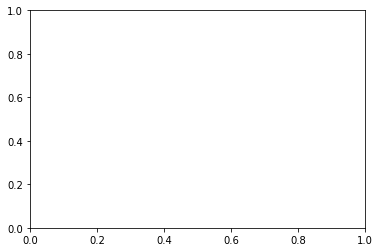

In [20]:
p = pyaudio.PyAudio()  # Create an interface to PortAudio
model = tf.keras.models.load_model(r"D:\Advait\Handouts_and_assignments\Raspberry_Pi\whistle_activated_camera\logs\M02_20220606_1\model.h5")

stream = p.open(format=pyaudio.paFloat32,
                channels = 1,
                rate = cfg['sound_config']['sr'],
                frames_per_buffer = 1,
                input = True)

frames = []
for i in range(100):
    fig, ax = plt.subplots(1,1)
    data = stream.read(cfg['sound_config']['duration']*cfg['sound_config']['sr'])
    data_f = np.frombuffer(data, dtype=np.float32)
    spec = get_spectrogram(data_f, cfg['spectrogram_config'])
    score = model.predict(spec[None,:,:,None])
    ax.imshow(spec)
    ax.set_title(score)
    plt.show()
    plt.close()

stream.stop_stream()
stream.close()
p.terminate()

In [18]:
model.predict(spec[None,:,:,None])

array([[0.00483446]], dtype=float32)